In [15]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# Load the data

In [16]:
X_train_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/X_train_1.npy')/255
X_test_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/X_test_1.npy')/255
Y_train_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/Y_train_1.npy')
Y_test_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/Y_test_1.npy')

In [3]:
#set some default parameter
BS = 32 #batch size
default_image_size = tuple((224,224))
image_size = 0
width=224
height=224
depth=3
n_classes=15

In [4]:
#define the metrics for training data
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Basic Model


In [6]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

import tensorflow as tf
model = tf.keras.backend.clear_session()
model = None
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
# creat model
model = Sequential()

# The first convolution layer
model.add(Conv2D(filters=64, kernel_size=[3, 3], strides=1, padding="same", activation="relu", input_shape=inputShape))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))

# The second convolution layer
model.add(Conv2D(filters=128, kernel_size=[3, 3], strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))

# The third convolution layer
model.add(Conv2D(filters=256, kernel_size=[3, 3], strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))

# The convolved output is flattened into a one-dimensional vector
model.add(Flatten())

# Fully connected layer
model.add(Dense(units=1024, activation="relu"))

# Classification layer
model.add(Dense(units=n_classes, activation="softmax"))

# Define the optimizer and the loss function
optimizer = Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy', f1_m,  precision_m, recall_m])

In [ ]:
# train the network
print("[INFO] training network...")
history = model.fit(X_train_1, Y_train_1, validation_data=(X_test_1, Y_test_1), epochs=100)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)
    
    epochs = np.arange(1, len(training) + 1)
    
    plt.figure()
    plt.plot(epochs, training, 'bo-', label='Train')
    plt.plot(epochs, validation, 'ro-', label='Val')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    
    filename = 'basic_cnn_{}.png'.format(yaxis)
    plt.savefig(filename)
    print('Figure saved as {}'.format(os.path.abspath(filename)))
    
    plt.show()



In [ ]:
display_training_curves(
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss')
display_training_curves(
    history.history['precision_m'], 
    history.history['val_precision_m'], 
    'precision')
display_training_curves(
    history.history['recall_m'], 
    history.history['val_recall_m'], 
    'recall')
display_training_curves(
    history.history['f1_m'], 
    history.history['val_f1_m'], 
    'f1 score')

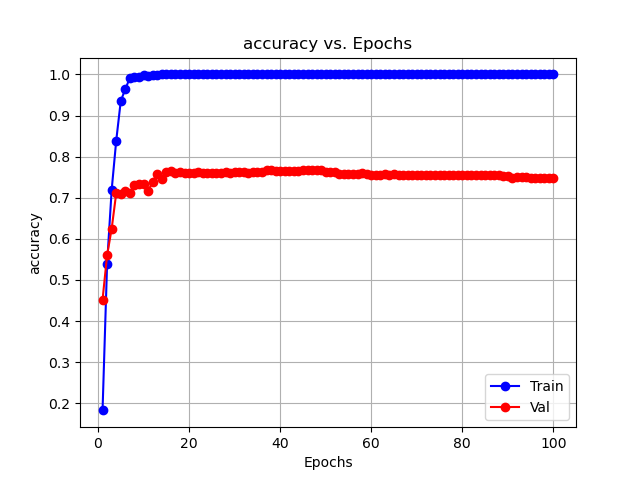

In [7]:
from IPython import display
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/basic_cnn_accuracy.png')

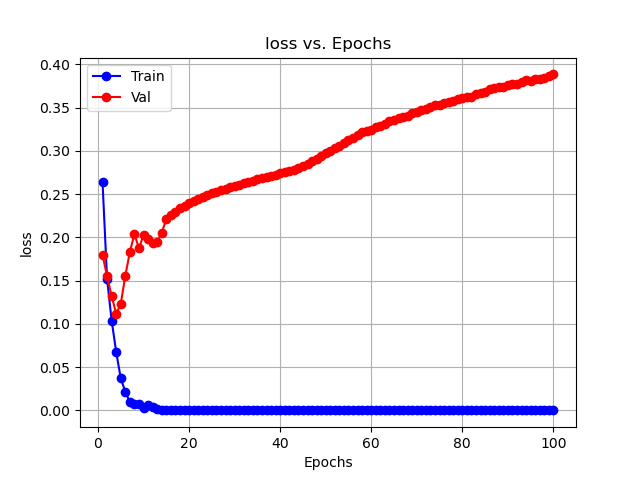

In [8]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/basic_cnn_loss.png')

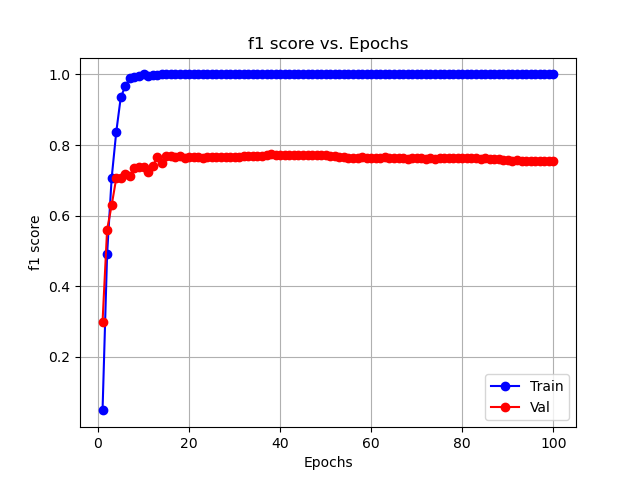

In [9]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/basic_cnn_f1 score.png')

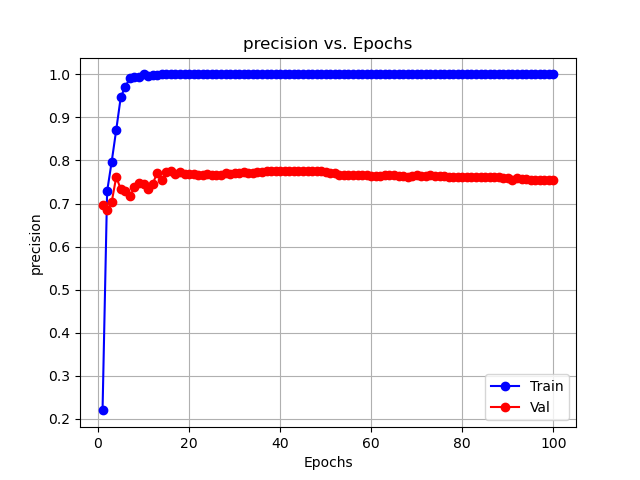

In [12]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/basic_cnn_precision.png')

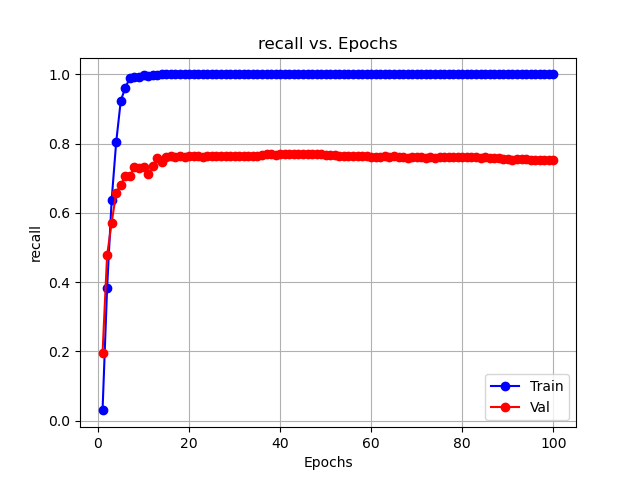

In [13]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/basic_cnn_recall.png')

The values of validation accuracy are relatively low and differ significantly from the train. In particular, the loss value starts to rise after 5 epoches. These indicate that the model is not performing well and there is a risk of overfitting or underfitting.

In [ ]:
def Res_Plot_Test_Save(name):
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(X_test_1, Y_test_1)
    print(f"Test Accuracy: {scores[1]*100}")
    print("[INFO] Saving model")
    model.save(name)

In [ ]:
Res_Plot_Test_Save('basic.h5')

[INFO] Calculating model accuracy
19/19 [==============================] - 5s 273ms/step - loss: 0.1308 - accuracy: 0.7242 - f1_m: 0.7222 - precision_m: 0.7405 - recall_m: 0.7052
Test Accuracy: 72.41962552070618
[INFO] Saving model


# data augmentation

Adding small perturbations or changes to the training data can, on the one hand, increase the training data and thus improve the generalization ability of the model, and on the other hand, increase the noise data and thus enhance the robustness of the model.

I use these data augmentation technoligies:
Image rotation

Image flipping: Flip the image horizontally or vertically.

Image whitening: Perform whitening operation on the image, which means normalizing the image itself to a Gaussian(0,1) distribution.

In [ ]:
def train_model(x_train, y_train, x_test, y_test, data_augmentation=False, flip=False, whiten=False):
    # model 1: image rotation
    if data_augmentation:
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
                                                               zoom_range=0.1,
                                                               width_shift_range=0.1,
                                                               height_shift_range=0.1)
        datagen.fit(x_train)
        history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                            epochs=30,
                            validation_data=(x_test, y_test))
    # model 2: image flipping
    elif flip:
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               vertical_flip=True)
        datagen.fit(x_train)
        history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                            epochs=30,
                            validation_data=(x_test, y_test))
    # model 3: image whitening
    elif whiten:
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,
                                                               featurewise_std_normalization=True)
        datagen.fit(x_train)
        history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                            epochs=30,
                            validation_data=(x_test, y_test))
    # model 4: use all the technologies above
    else:
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            featurewise_center=True, 
            featurewise_std_normalization=True, 
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            horizontal_flip=True, 
            vertical_flip=True, 
        )
        datagen.fit(x_train)
        history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                            epochs=30,
                            validation_data=(x_test, y_test))
    return history

# train 3 models
history1 = train_model(X_train_1, Y_train_1, X_test_1, Y_test_1, data_augmentation=True)
history2 = train_model(X_train_1, Y_train_1, X_test_1, Y_test_1, flip=True)
history3 = train_model(X_train_1, Y_train_1, X_test_1, Y_test_1, whiten=True)
history4 = train_model(X_train_1, Y_train_1, X_test_1, Y_test_1)



In [ ]:
plt.figure()
plt.plot(history1.history['loss'], label='Data Augmentation')
plt.plot(history2.history['loss'], label='flip')
plt.plot(history3.history['loss'], label='whiten')
plt.plot(history4.history['loss'], label='all')
plt.title('model_augment_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('model_augment_Loss.png')


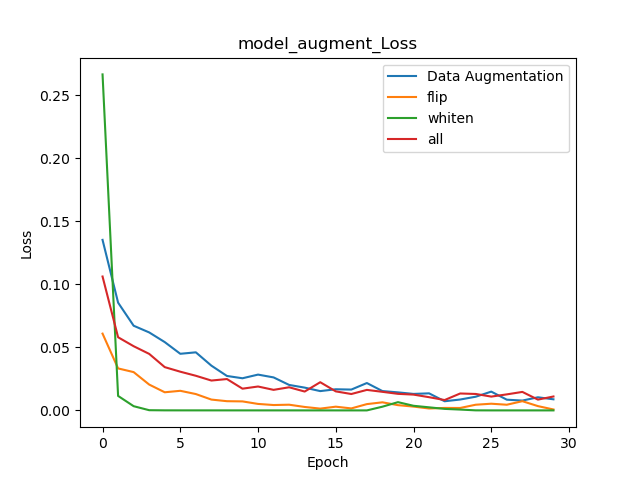

In [17]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/model_augment_Loss.png')

In [ ]:
plt.figure()
plt.plot(history1.history['val_accuracy'], label='Data Augmentation')
plt.plot(history2.history['val_accuracy'], label='flip')
plt.plot(history3.history['val_accuracy'], label='whiten')
plt.plot(history4.history['val_accuracy'], label='all')
plt.title('model_augment_validation accuracy.png')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('model_augment_validation accuracy.png')


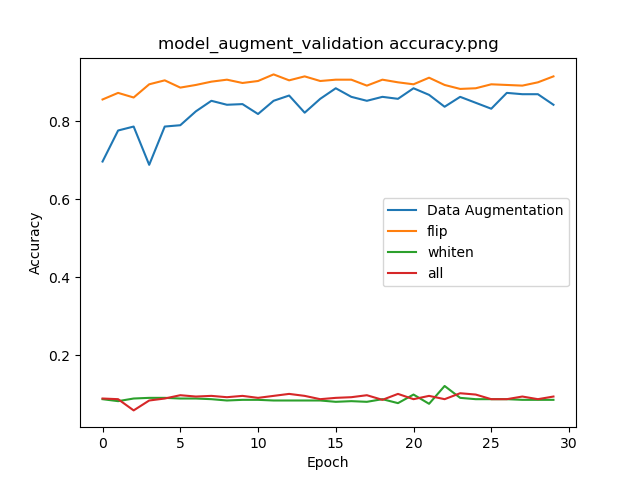

In [18]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/model_augment_validation accuracy.png')

Image flipping performs best among these methods

# learning rate

I use three learning rate strategies:

model 1：use learning_rate=0.01

model 2：use learning_rate=0.01 for the first 10 epoches, and 0.001 for the rest

model 3：use learning_rate=0.01 for the first 10 epoches, and 0.001 for the next 19 epoches and then use 0.0005 for the rest




In [30]:
#based on the above experiment, I use Image flipping as our data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               vertical_flip=True)

model = tf.keras.backend.clear_session()
model = None
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

model = Sequential()


model.add(Conv2D(filters=64, kernel_size=[3, 3], strides=1, padding="same", activation="relu", input_shape=inputShape))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))


model.add(Conv2D(filters=128, kernel_size=[3, 3], strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))

model.add(Conv2D(filters=256, kernel_size=[3, 3], strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))


model.add(Flatten())


model.add(Dense(units=1024, activation="relu"))


model.add(Dense(units=n_classes, activation="softmax"))


In [31]:
# model 1：use learning_rate=0.01


def model1():
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# model 2：use learning_rate=0.01 for the first 10 epoches, and 0.001 for the rest
def model2():
    def lr_schedule(epoch=30):
        if epoch < 100:
            return 0.01
        else:
            return 0.001

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# model 3：use learning_rate=0.01 for the first 10 epoches, and 0.001 for the next 19 epoches and then use 0.0005 for the rest
def model3():
    def lr_schedule(epoch=30):
        if epoch < 100:
            return 0.01
        elif epoch < 200:
            return 0.001
        else:
            return 0.0005
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model




In [32]:
# creat 3 models
model_1 = model1()
model_2 = model2()
model_3 = model3()

In [ ]:
# train 3 models
history_1 = model_1.fit(datagen.flow(X_train_1, Y_train_1, batch_size=32), epochs=30, validation_data=(X_test_1,Y_test_1), verbose=0)
history_2 = model_2.fit(datagen.flow(X_train_1, Y_train_1, batch_size=32), epochs=30,validation_data=(X_test_1,Y_test_1), verbose=0)
history_3 = model_3.fit(datagen.flow(X_train_1, Y_train_1, batch_size=32), epochs=30, validation_data=(X_test_1, Y_test_1), verbose=0)



## display loss curve

In [ ]:
plt.figure()
plt.plot(history_1.history['loss'], label='rate 0.01')
plt.plot(history_2.history['loss'], label='rate 0.01+0.001')
plt.plot(history_3.history['loss'], label='rate 0.01+0.001+0.0005')
plt.title('learning rate_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('learning_rate_Loss')


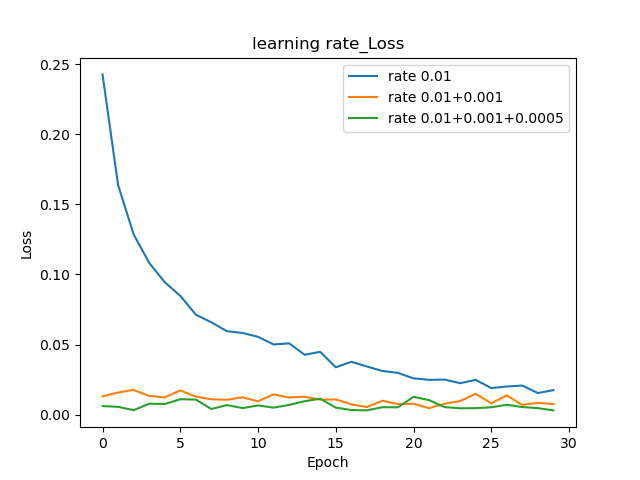

In [19]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/learning_rate_Loss.png')

The plot shows the third method performs best. Gradually decreasing the learning rate helps the model to learn better.

## display accuracy curve

In [ ]:

plt.figure()
plt.plot(history_1.history['val_accuracy'], label='rate 0.01')
plt.plot(history_2.history['val_accuracy'], label='rate 0.01+0.001')
plt.plot(history_3.history['val_accuracy'], label='rate 0.01+0.001+0.0005')
plt.xlabel('Epoch')
plt.ylabel('learning_rate_Accuracy.png')
plt.legend()
plt.show()

# Final model

display_training_curves(
    history_3.history['accuracy'], 
    history_3.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history_3.history['loss'], 
    history_3.history['val_loss'], 
    'loss')
display_training_curves(
    history_3.history['precision_m'], 
    history_3.history['val_precision_m'], 
    'precision')
display_training_curves(
    history_3.history['recall_m'], 
    history_3.history['val_recall_m'], 
    'recall')
display_training_curves(
    history_3.history['f1_m'], 
    history_3.history['val_f1_m'], 
    'f1 score')

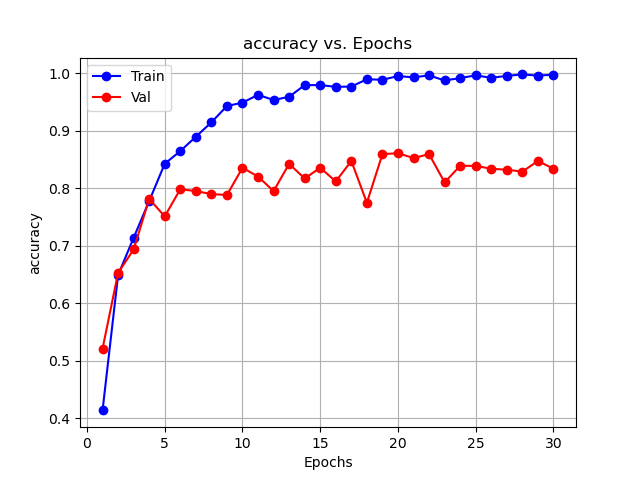

In [2]:
from IPython import display
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/final_cnn_accuracy.png')

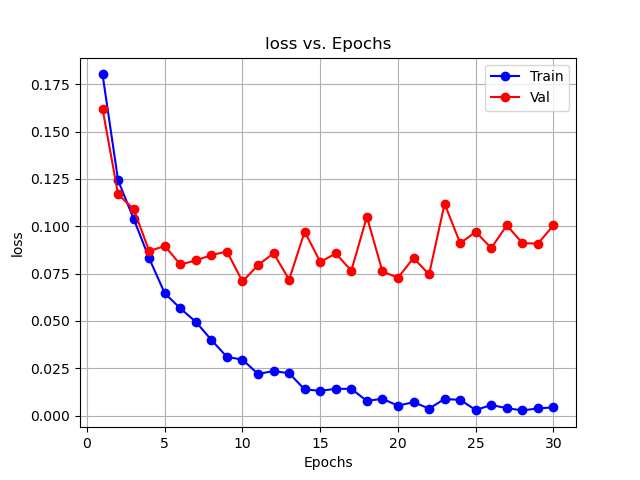

In [3]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/final_cnn_loss.png')

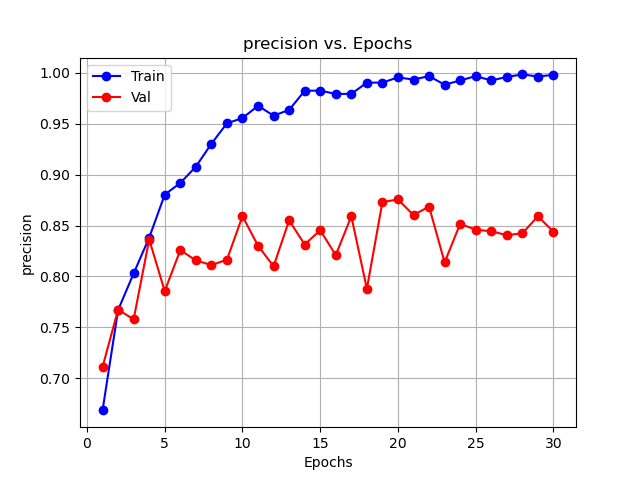

In [4]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/final_cnn_precision.png')

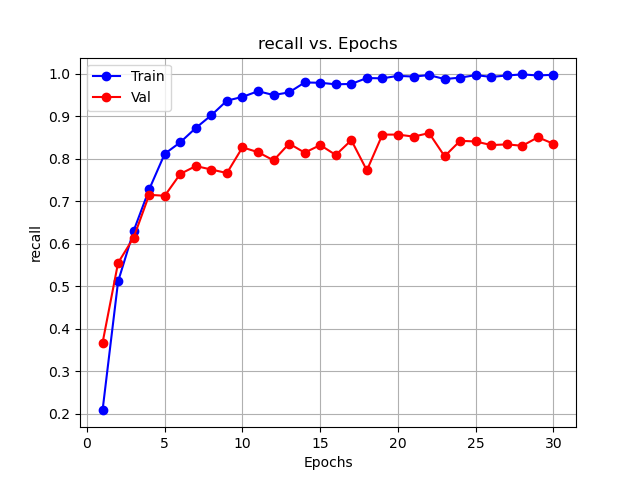

In [5]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/final_cnn_recall.png')

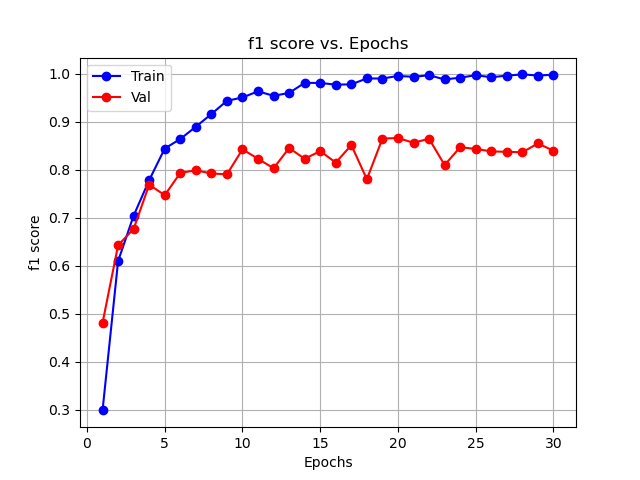

In [6]:
display.Image('C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/plant output hpc/final_cnn_f1 score.png')

Compared to the original model, we found the accuracy increases by 10% and the loss value decreases and converges after using image flipping and a decreasing learning rate.